<a href="https://colab.research.google.com/github/sjunkim95/lab-python/blob/main/py21_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 셋

In [48]:
tips = sns.load_dataset('tips')

In [49]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [50]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# `matplotlib.pyplot` 모듈을 사용한 시각화

1. `figure` 객체 생성.
2. `figure` 객체에 subplot(axis)을 생성해서 추가.
3. subplot에 그래프 그림
4. 그래프의 여러가지 옵션들을 설정.
5. 그래프 보여주기.

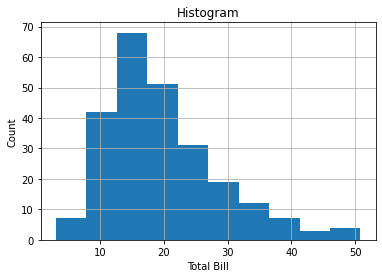

In [51]:
# 1. figure 객체 생성
fig = plt.figure()

# 2. 생성된 figure 객체에 subplot을 추가
axis = fig.add_subplot(1, 1, 1) # add_subplot에서 인덱스는 1부터 시작!

# 3. subplot에 그래프 종류를 선택해서 그림.
axis.hist(x=tips['total_bill'])

# 4. 그래프의 옵션 설정
axis.grid()
axis.set_xlabel('Total Bill')
axis.set_ylabel('Count')
axis.set_title('Histogram')

# 5. 그래프 보여주기
plt.show()

2개의 subplot을 상하로 배치하고 그래프를 그리기.

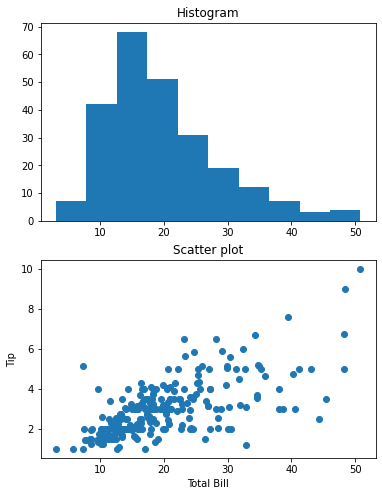

In [52]:
# 1. figure 생성
fig = plt.figure(figsize=(6, 8))

# 2. subplot 추가
ax1 = fig.add_subplot(2, 1, 1) # row 갯수 2개, 컬럼 갯수 1개, 그 중에서 1번.
ax2 = fig.add_subplot(212) # add_subplit(2, 1, 2)와 동일.

# 3. 각 subplot에 그래프 그림.
ax1.hist(x=tips.total_bill) # 히스토그램
ax2.scatter(x=tips.total_bill, y=tips.tip) # 산점도

# 4. 옵션 설정.
ax1.set_title('Histogram')
ax2.set_title('Scatter plot')
ax2.set_xlabel('Total Bill')
ax2.set_ylabel('Tip')

# 5. 보여주기
plt.show()

2개의 subplot을 좌우로 배치해서 그래프 그리기.

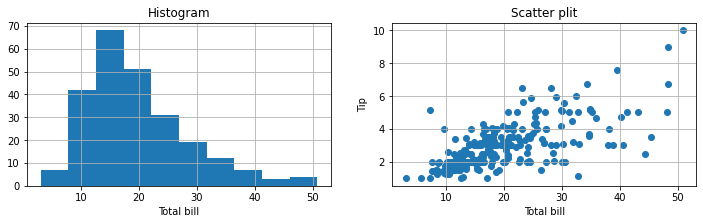

In [53]:
# 1. figure 생성
fig = plt.figure(figsize=(12, 3)) # figsize=(width, height)

# 2. subplot 추가
ax1 = fig.add_subplot(1, 2, 1) # row 1개에 column이 2개, index는 1번.
ax2 = fig.add_subplot(122) # add_subplit(2, 1, 2)와 동일.

# 3. 각 subplot에 그래프 그림 / # 4. 옵션 설정.
ax1.hist(tips.total_bill) # 히스토그램
ax1.grid()
ax1.set_xlabel('Total bill')
ax1.set_title('Histogram')

ax2.scatter(x=tips.total_bill, y=tips.tip) # 산점도
ax2.grid()
ax2.set_xlabel('Total bill')
ax2.set_ylabel('Tip')
ax2.set_title('Scatter plit')

# 5. 보여주기
plt.show()

## `plt.subplots()` 함수

figure 객체 생성(`plt.figure()`) + subplot 추가(`figure.add_subplot()`)

1개의 figure에 1개의 subplot이 있는 경우

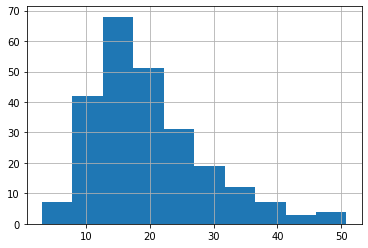

In [54]:
# 1. figure 생성. 2. subplot 생성.
fig, ax = plt.subplots() # nrows=1, ncols=1

# 3. 그래프 그리기.
ax.hist(x=tips.total_bill)

# 4. 옵션 설정.
ax.grid()

# 5. 그래프 보여주기.
plt.show()

`plt.subplots()` 함수를 사용해서 히스토그램과 산점도를 상/하로 배치.

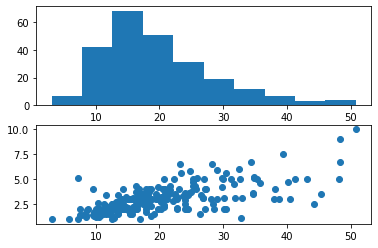

In [55]:
fig, ax = plt.subplots(nrows=2)

ax[0].hist(x=tips.total_bill)
ax[1].scatter(x=tips.total_bill, y=tips.tip)

plt.show()

`plt.subplots()` 함수를 사용해서 히스토그램과 산점도를 좌/우로 배치.

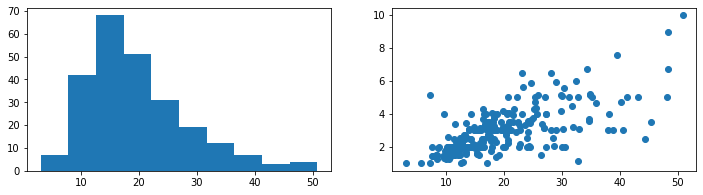

In [56]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 3))
# print(ax) # -> 1차원 nd array

ax[0].hist(x=tips.total_bill)
ax[1].scatter(x=tips.total_bill, y=tips.tip)

plt.show()

## `pyplot` 모듈의 top-level 함수

figure 1개 생성, subplot 1개 생성, 그래프를 그림.

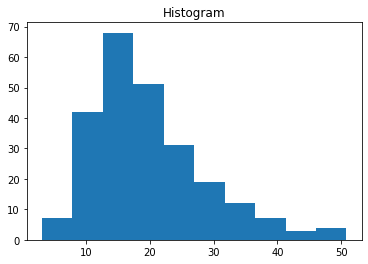

In [57]:
# 1. figure 생성. 2. subpot 1개 생성. 3. 그래프 그림.
plt.hist(x=tips.total_bill)

# 4. 옵션 설정.
plt.title('Histogram')

# 5. 그래프 그리기.
plt.show()

# Box Plot(상자 그림)

숫자 타입 변수(컬럼)의 기술 통계량(descriptive statistics)을 상자 모양으로 시각화.

* 최솟값, 최댓값, 4분위값(25%, 중앙값, 75%)

In [58]:
# tips 테이터프레임에서 total_bill 변수(컬럼)의 기술 통계량
tips.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

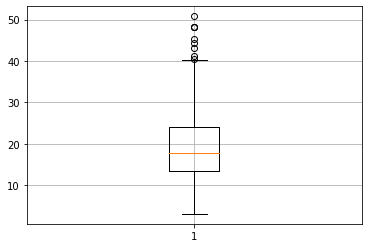

In [59]:
plt.boxplot(x=tips.total_bill)
plt.grid()
plt.show()

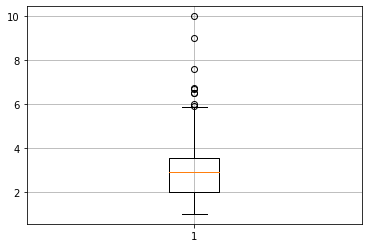

In [60]:
plt.boxplot(x=tips.tip)
plt.grid()
plt.show()

In [61]:
tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

# Histogram(히스토그램)

연속형 자료를 구간으로 나눠서 구간 안에 포함된 자료의 개수를 막대의 높이로 표현한 그래프.

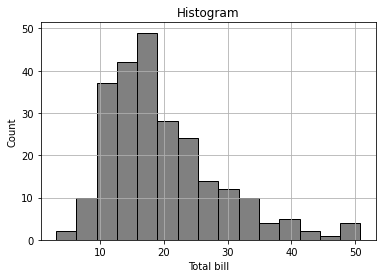

In [62]:
plt.hist(x=tips.total_bill, bins=15, edgecolor='black', color='gray') # bins 막대 갯수
#> x: 히스토그램을 그리기 위한 자료(변수)
#> bins: 막대 개수 또는 구간
#> color: 막대 안쪽을 채우는 색깔
#> edgecolor: 막대 테두리 선 색깔

plt.title('Histogram')
plt.xlabel('Total bill')
plt.ylabel('Count')
plt.grid()

plt.show()

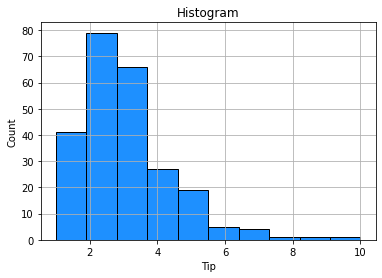

In [63]:
# tip의 히스토그램
plt.hist(x=tips['tip'], edgecolor='black', color='dodgerblue') # bins 막대 갯수
#> x: 히스토그램을 그리기 위한 자료(변수)
#> bins: 막대 개수 또는 구간
#> color: 막대 안쪽을 채우는 색깔
#> edgecolor: 막대 테두리 선 색깔

plt.title('Histogram')
plt.xlabel('Tip')
plt.ylabel('Count')
plt.grid()

plt.show()

# Bar plot (막대 그래프)

카테고리 타입 변수의 빈도수를 막대로 표현한 그래프.



In [64]:
# 성별 빈도수
gender_counts = tips.sex.value_counts() # series임 157, 87은 -> values라 부른다.
gender_counts # 값에 붙은 male, female은 index라 부른다.

Male      157
Female     87
Name: sex, dtype: int64

In [65]:
# 모든 Series는 index와 values 속성을 가지고 있다.
print(gender_counts.index)
print(gender_counts.values)

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category')
[157  87]


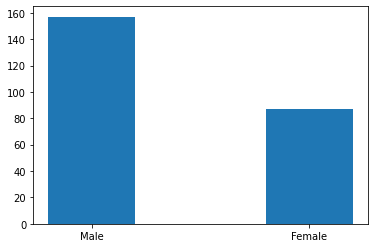

In [66]:
plt.bar(x=gender_counts.index, height=gender_counts.values, width=0.4)
plt.show()

가로 막대 그래프

<BarContainer object of 2 artists>

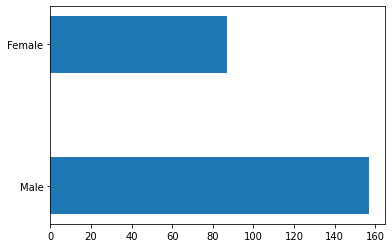

In [67]:
plt.barh(y=gender_counts.index, width=gender_counts.values, height=0.4)

# Exercises

## Ex 1. 요일 막대 그래프(요일 빈도수)

* 세로 막대 그래프
* 가로 막대 그래프


In [68]:
day_counts = tips.day.value_counts() 
day_counts

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

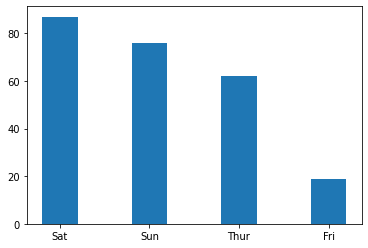

In [69]:
# 세로 막대 그래프
plt.bar(x=day_counts.index, height=day_counts.values, width=0.4)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

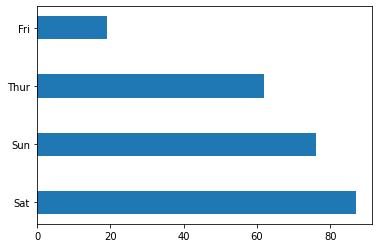

In [70]:
# 가로 막대 그래프
plt.barh(y=day_counts.index, width=day_counts.values, height=0.4)
plt.show

## Ex 2. 흡연여부 막대 그래프(흡연자/비흡연자 빈도수)

* 세로 막대 그래프
* 가로 막대 그래프


In [71]:
smoker_counts = tips.smoker.value_counts()
smoker_counts

No     151
Yes     93
Name: smoker, dtype: int64

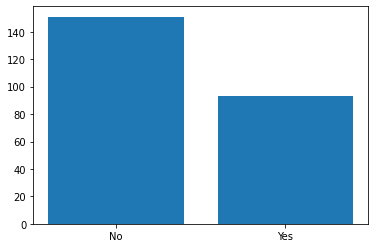

In [72]:
# 세로 막대 그래프
plt.bar(x=smoker_counts.index, height=smoker_counts.values)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

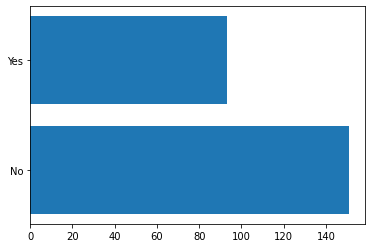

In [73]:
# 가로 막대 그래프
plt.barh(y=smoker_counts.index, width=smoker_counts.values)
plt.show

## Ex 3. 식사 인원 막대 그래프

* 세로 막대 그래프
* 가로 막대 그래프


In [74]:
size_counts = tips['size'].value_counts() 
size_counts

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

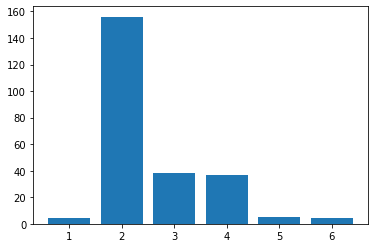

In [75]:
# 세로 막대 그래프
plt.bar(x=size_counts.index, height=size_counts.values)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

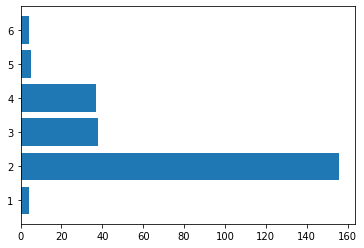

In [76]:
# 가로 막대 그래프
plt.barh(y=size_counts.index, width=size_counts.values)
plt.show

## Ex 4. 성별 tip의 box plot을 하나의 subplot에 그리기.

In [77]:
tips.sex.unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [78]:
tip_female = tips[tips.sex == 'Female']['tip']
tip_female

0      1.01
4      3.61
11     5.00
14     3.02
16     1.67
       ... 
226    2.00
229    2.88
238    4.67
240    2.00
243    3.00
Name: tip, Length: 87, dtype: float64

In [79]:
tip_female.describe()

count    87.000000
mean      2.833448
std       1.159495
min       1.000000
25%       2.000000
50%       2.750000
75%       3.500000
max       6.500000
Name: tip, dtype: float64

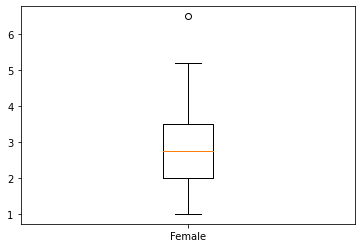

In [80]:
plt.boxplot(x=tip_female, labels=['Female'])
plt.show()

In [81]:
tip_male = tips[tips.sex == 'Male']['tip']
tip_male

1      1.66
2      3.50
3      3.31
5      4.71
6      2.00
       ... 
236    1.00
237    1.17
239    5.92
241    2.00
242    1.75
Name: tip, Length: 157, dtype: float64

In [82]:
tip_male.describe()

count    157.000000
mean       3.089618
std        1.489102
min        1.000000
25%        2.000000
50%        3.000000
75%        3.760000
max       10.000000
Name: tip, dtype: float64

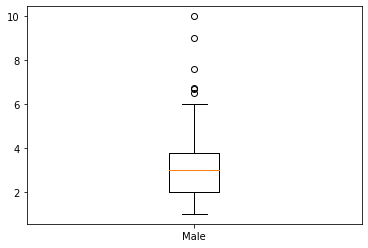

In [83]:
plt.boxplot(x=tip_male, labels=['Male'])
plt.show()

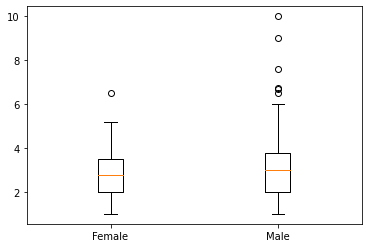

In [84]:
plt.boxplot(x=np.array([tip_female, tip_male], dtype=object), 
            labels=['Female', 'Male'])
plt.show()

## Ex 5. 시간별 tip의 box plot을 하나의 subplot에 그리기.

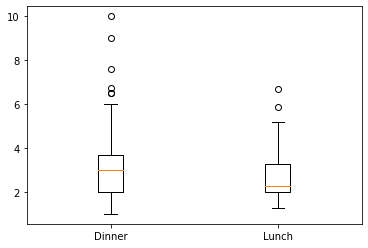

In [85]:
times = tips.time.unique()
data = []
for t in times:
    tip_by_time = tips[tips.time == t].tip
    # print(tip_by_time)
    data.append(tip_by_time)

plt.boxplot(x=np.array(data, dtype=object), labels=times)
plt.show()

## Ex 6. 요일별 tip의 box plot을 하나의 subplot에 그리기.

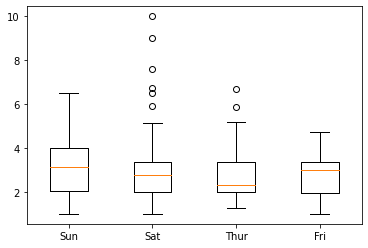

In [86]:
days = tips.day.unique()
data = [tips[tips.day == x].tip for x in days]
plt.boxplot(x=np.array(data, dtype=object), labels=days)
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


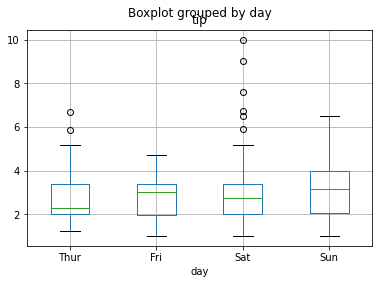

In [87]:
# pd.DataFrame의 그래프 메서드
tips.boxplot(column='tip', by='day')
plt.show()

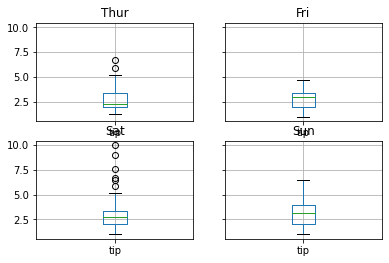

In [88]:
# pd.DataFrameGroupBy의 메서드
tips.groupby('day').boxplot(column='tip')
plt.show()

# Scatter plot(산점도)

두 변수 사이의 상관 관계를 파악하기 위해서 사용.

`y ~ x`. `y = ax + b`.


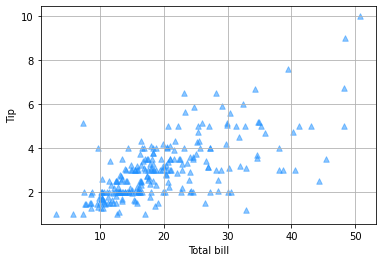

In [89]:
# tip ~ total_bill
plt.scatter(x=tips.total_bill, y=tips.tip,
            alpha=0.5, c='dodgerblue', s=30, marker='^')
#> alpha: 불투명도(0: 투명 ~ 1: 불투명)
#> c: 마커(점)의 색깔(color)
#> s: 마커 크기(size)
#> marker: 마커 모양. 'o', '^', 'v', '*', 's', ...

plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.grid()

plt.show()

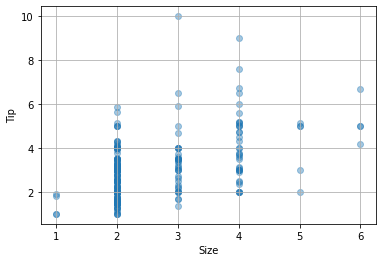

In [90]:
# tip ~ size: boxplot과 같이 데이터의 분산을 보여줌.
plt.scatter(x=tips['size'], y=tips['tip'], alpha=0.4)

plt.xlabel('Size')
plt.ylabel('Tip')
plt.grid()

plt.show()

# Line plot(선 그래프)

주로 시계열 데이터(시간에 따라서 변하는 데이터: 주가, 환율, 날씨, ...)를 시각화.


In [91]:
np.random.seed(1)
df = pd.DataFrame(data={'x1': np.arange(11, 21),
                        'x2': np.random.rand(10)})
df

,x1,x2
0,11,0.417022
1,12,0.720324
2,13,0.000114
3,14,0.302333
4,15,0.146756
5,16,0.092339
6,17,0.186260
7,18,0.345561
8,19,0.396767
9,20,0.538817


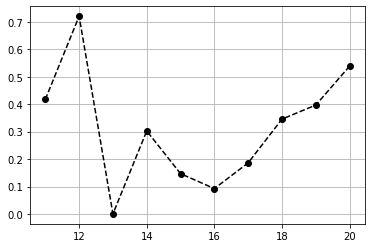

In [92]:
# x2 ~ x1
plt.plot(df.x1, df.x2, 'ko--')
# plt.plot([x], y, [fmt])
# param fmt: 문자열. (1) 선과 마커의 색깔, (2) 마커의 모양, (3) 선의 스타일을 설정.
#  (1) 색깔(color): b(lue), (blac)k, r(ed), g(reen), ...
#  (2) 마커 모양(marker): o, s, ^, v, *, +, ...
#  (3) 선 스타일(linestyle): -(solid line, 직선), :(dotted line, 점선), --(dashed line), ...

plt.grid()
plt.show()

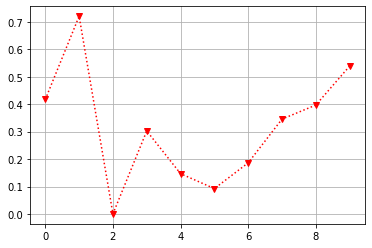

In [93]:
# x2 ~ index
plt.plot(df.x2, c='red', marker='v', linestyle='dotted')

plt.grid()
plt.show()

하나의 subplot에 여러개의 선 그래프 그리기

In [94]:
np.random.seed(1)
df = pd.DataFrame(data={'x': np.arange(1, 11),
                        'y1': np.random.rand(10),
                        'y2': np.random.rand(10),
                        'y3': np.random.rand(10)})
df

,x,y1,y2,y3
0,1,0.417022,0.419195,0.800745
1,2,0.720324,0.685220,0.968262
2,3,0.000114,0.204452,0.313424
3,4,0.302333,0.878117,0.692323
4,5,0.146756,0.027388,0.876389
5,6,0.092339,0.670468,0.894607
6,7,0.186260,0.417305,0.085044
7,8,0.345561,0.558690,0.039055
8,9,0.396767,0.140387,0.169830
9,10,0.538817,0.198101,0.878143


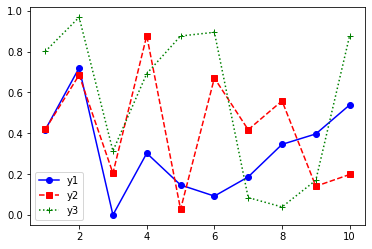

In [95]:
# y1 ~ x
plt.plot(df.x, df.y1, 'bo-', label='y1')
# y2 ~ x
plt.plot(df.x, df.y2, 'rs--', label='y2')
# y3 ~ x
plt.plot(df.x, df.y3, 'g+:', label='y3')

plt.legend()  # 범례: 각 plot 함수의 label을 그래프에 추가.
plt.show()

# Exercies

Ex 1.

* 4개의 subplot을 2x2 모양으로 배치.
* 4개의 subplot에 각각 성별 빈도수, 흡연여부 빈도수, 요일 빈도수, 시간 빈도수 그래프를 그리세요.


In [96]:
gender_counts = tips.sex.value_counts()
smoker_counts = tips.smoker.value_counts()
day_counts = tips.day.value_counts()
time_counts = tips.time.value_counts()

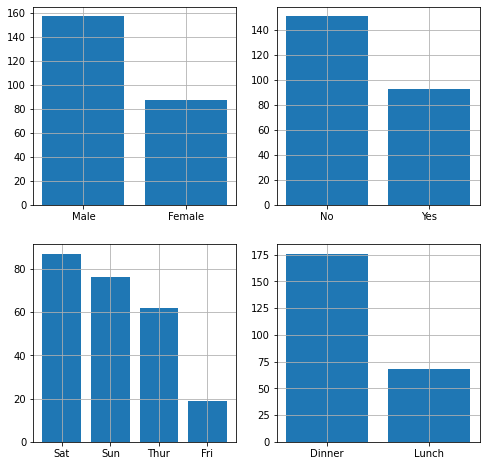

In [97]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

ax[0, 0].bar(x=gender_counts.index, height=gender_counts.values)
ax[0, 1].bar(x=smoker_counts.index, height=smoker_counts.values)
ax[1, 0].bar(x=day_counts.index, height=day_counts.values)
ax[1, 1].bar(x=time_counts.index, height=time_counts.values)

for i in range(2):  # nrows
    for j in range(2):  # ncols
        ax[i, j].grid()

plt.show()

Ex 2.

* `tip ~ total_bill`의 상관관계를 scatter plot으로 그리세요.
* 성별로 점의 색깔을 다르게 표현하세요.
* 범례를 표시.


In [98]:
tips_male = tips[tips.sex == 'Male']  # 남성 부분집합
tips_female = tips[tips.sex == 'Female']  # 여성 부분집합

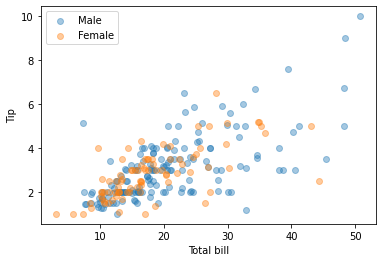

In [99]:
# 남성 데이터 산점도
plt.scatter(x=tips_male.total_bill, y=tips_male.tip, alpha=0.4, label='Male')
# 여성 데이터 산점도
plt.scatter(x=tips_female.total_bill, y=tips_female.tip, alpha=0.4, label='Female')

plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.legend()  # 범례
plt.show()

Ex 3.

* `tip ~ total_bill`의 상관관계를 scatter plot으로 그리세요.
* 요일별로 점의 색깔, 모양을 다르게 표현하세요.
* 범례를 표시.


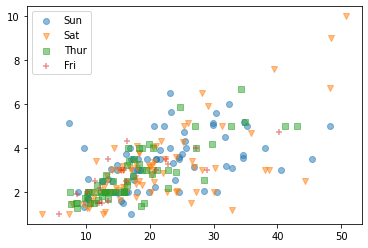

In [100]:
days = tips.day.unique()  # 요일들
markers = ['o', 'v', 's', '+']  # 마커(점)의 모양

for d, m in zip(days, markers):
    subset = tips[tips.day == d]
    plt.scatter(x=subset.total_bill, y=subset.tip, label=d, alpha=0.5, marker=m)

plt.legend()
plt.show()